In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.optimize import curve_fit
import plotly.io as pio
import os
import re

# --- Custom Plotly Template with axis label & tick label font sizes ---
fig_template = go.layout.Template()
fig_template.layout = {
    'template': 'simple_white+presentation',
    'autosize': False,
    'width': 800,
    'height': 600,
    'xaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 2.5,
        'tickwidth': 2.5,
        'ticklen': 4,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white',
        'titlefont': dict(size=34),   # axis label font size
        'tickfont': dict(size=30),   # tick labels font size
    },
    'yaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 2.5,
        'tickwidth': 2.5,
        'ticklen': 4,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white',
        'titlefont': dict(size=34),   # axis label font size
        'tickfont': dict(size=30),    # tick labels font size
    },
    'font': {
        'family': 'mathjax',
        'size': 30,  # legend, annotation, general text
    }
}

In [ ]:
path = os.getcwd()

## Absorption Spectra

In [ ]:
# # --- Load Data ---
# file_path = r"C:\Users\Atanu\OneDrive\Desktop\research_work\paper\NaBiF4_PL_analysis\Absorption Spectra\NaBiF_K.dat"
# data = np.loadtxt(file_path)
# x = data[:, 0]            # wavelength (nm)
# y = 100 - data[:, 1]      # absorbance (% -> transform you had)

# # --- Define wavelength-color mapping ---
# x_min, x_max = 300.0, 1200.0

# wave_color_stops = [
#     (300, "darkgray"),  # UV below 380
#     (380, "violet"),    # start visible
#     (450, "blue"),
#     (500, "cyan"),
#     (530, "green"),
#     (570, "yellow"),
#     (620, "orange"),
#     (650, "red"),
#     (740, "red"),       # visible limit
#     (770, "plum"),     # IR → light purple
#     (1200, "plum"),     # IR → light purple
# ]

# colorscale = [
#     ((wl - x_min) / (x_max - x_min), col) for wl, col in wave_color_stops
# ]

# # --- Plot ---
# fig = go.Figure()

# fig.add_trace(go.Scatter(
#     x=x,
#     y=y,
#     mode='lines+markers',
#     line=dict(width=2.5, color="rgba(0,0,0,0.2)"),  # faint connecting line
#     marker=dict(
#         size=7,
#         color=x,                # actual wavelength values
#         colorscale=colorscale, 
#         cmin=x_min,
#         cmax=x_max,
#         showscale=False         # remove colorbar
#     ),
#     name="Absorption"
# ))

# # --- Layout ---
# fig.update_layout(
#     template=fig_template,
#     width=800,
#     height=600,
#     margin=dict(l=100, r=50, t=50, b=80),  # extra left margin
    
#     xaxis_title="Wavelength (nm)",
#     yaxis_title="Absorbance (a.u.)",
# )

# fig.update_xaxes(range=[x_min, x_max])

# fig.show()

# # pio.write_image(fig,  "Absorption Spectra.png")

C:\Users\Atanu\AppData\Local\Temp\ipykernel_14104\1467021946.py:52: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

C:\Users\Atanu\AppData\Local\Temp\ipykernel_14104\1467021946.py:53: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



✅ Figure saved as: C:\Users\Atanu\OneDrive\Desktop\research_work\paper\NaBiF4_PL_analysis\Absorption Spectra\Absorption_Comparison.png


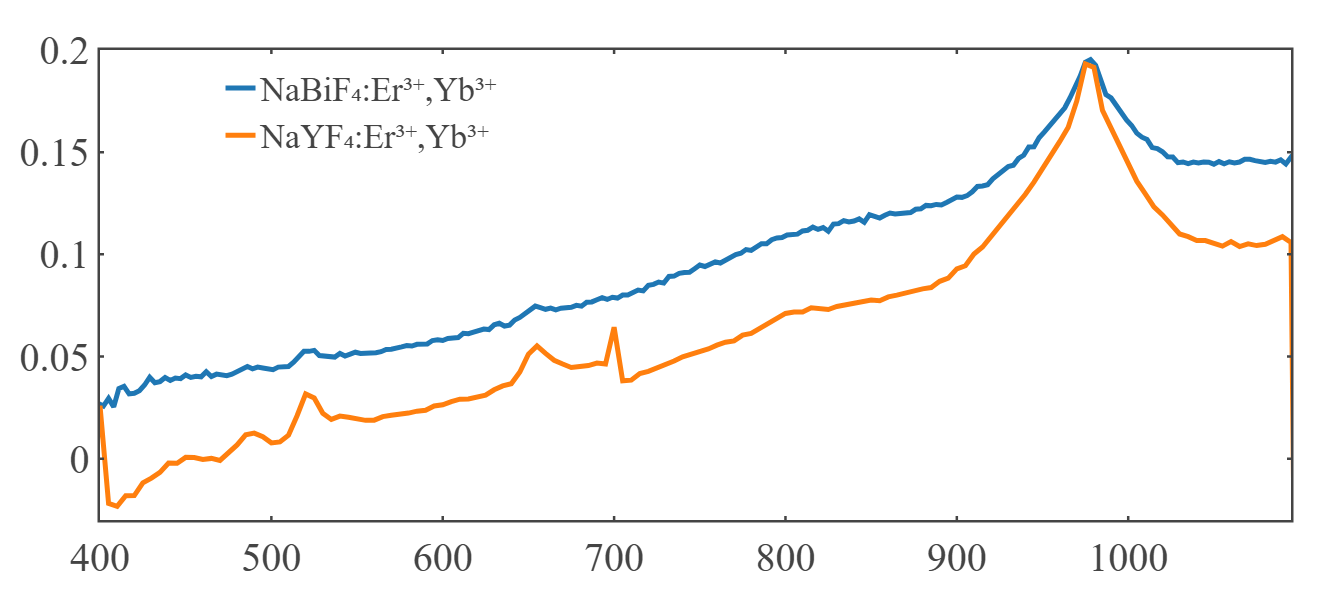

In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import os

# ============================================================
# --- Custom Plotly Template (fixed version, larger fonts) ---
# ============================================================
fig_template = go.layout.Template()
fig_template.layout = go.Layout(
    template='simple_white+presentation',
    autosize=False,
    width=800,
    height=600,
    xaxis=dict(
        ticks='inside',
        mirror='ticks',
        linewidth=2.5,
        tickwidth=2.5,
        ticklen=4,
        showline=True,
        showgrid=False,
        zerolinecolor='white',
        title=dict(font=dict(size=40)),   # ⬆ Larger title font
        tickfont=dict(size=40)            # ⬆ Larger tick font
    ),
    yaxis=dict(
        ticks='inside',
        mirror='ticks',
        linewidth=2.5,
        tickwidth=2.5,
        ticklen=4,
        showline=True,
        showgrid=False,
        zerolinecolor='white',
        title=dict(font=dict(size=40)),   # ⬆ Larger title font
        tickfont=dict(size=40)            # ⬆ Larger tick font
    ),
    font=dict(family='mathjax', size=34)  # ⬆ Larger base font (legend, etc.)
)

# ============================================================
# --- File Paths ---
# ============================================================
path_bi = r"C:\Users\Atanu\OneDrive\Desktop\research_work\paper\NaBiF4_PL_analysis\Absorption Spectra\NaBiF_K.dat"
path_y = r"C:\Users\Atanu\OneDrive\Desktop\research_work\paper\NaBiF4_PL_analysis\Absorption Spectra\NaYF.dat"

# ============================================================
# --- Load Data ---
# ============================================================
df_bi = pd.read_csv(path_bi, delim_whitespace=True, header=None, names=['Wavelength', 'Reflectance'])
df_y = pd.read_csv(path_y, delim_whitespace=True, header=None, names=['Wavelength', 'Reflectance'])

# ============================================================
# --- Convert Reflectance (%) → Absorbance (log scale) ---
# ============================================================
df_bi['Absorbance'] = np.log10(100 / df_bi['Reflectance'])
df_y['Absorbance'] = np.log10(100 / df_y['Reflectance'])

# ============================================================
# --- Create Figure ---
# ============================================================
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_bi['Wavelength'], y=df_bi['Absorbance'],
    mode='lines', line=dict(width=5),
    name='NaBiF₄:Er³⁺,Yb³⁺'
))

fig.add_trace(go.Scatter(
    x=df_y['Wavelength'], y=df_y['Absorbance'],
    mode='lines', line=dict(width=5),
    name='NaYF₄:Er³⁺,Yb³⁺'
))

# ============================================================
# --- Axis Ranges ---
# ============================================================
fig.update_xaxes(range=[400, 1095])
fig.update_yaxes(range=[-0.03, 0.2])

# ============================================================
# --- Layout Settings ---
# ============================================================
fig.update_layout(
    template=fig_template,
    width=800,
    height=600,
    margin=dict(l=100, r=50, t=50, b=80),
    # xaxis_title="Wavelength (nm)",
    # yaxis_title="Absorbance (log<sub>10</sub>(100/R))",
    legend=dict(
        x=0.22, y=0.98,
        xanchor='center',
        font=dict(size=34)  # ⬆ Larger legend font
    )
)

# ============================================================
# --- Save as PNG using Plotly I/O ---
# ============================================================
output_path = os.path.join(os.path.dirname(path_bi), "Absorption_Comparison.png")
pio.write_image(fig, output_path, format='png', scale=4)
print(f"✅ Figure saved as: {output_path}")

# ============================================================
# --- Show Figure ---
# ============================================================
fig.show()


In [40]:
min_y

-0.2936594973378945

## XRD

✅ Figure saved as: C:\Users\Atanu\OneDrive\Desktop\research_work\paper\NaBiF4_PL_analysis\XRD\XRD.png


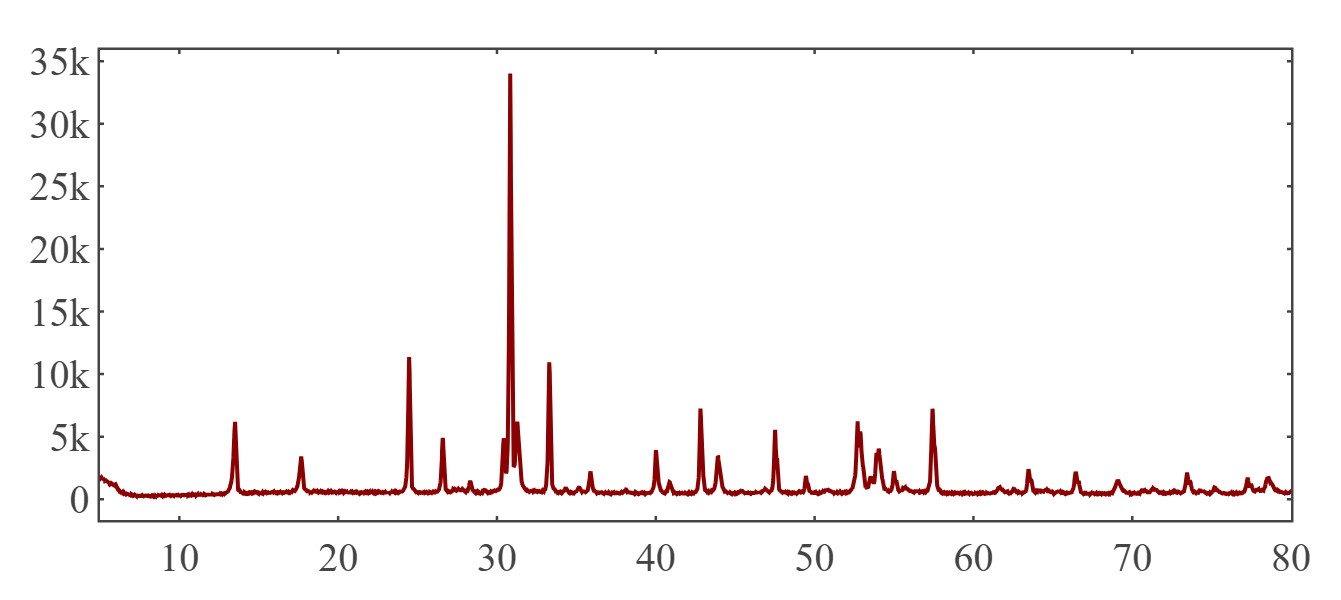

In [9]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import os

# ============================================================
# --- Custom Plotly Template (fixed version) ---
# ============================================================
fig_template = go.layout.Template()
fig_template.layout = go.Layout(
    template='simple_white+presentation',
    autosize=False,
    width=800,
    height=600,
    xaxis=dict(
        ticks='inside',
        mirror='ticks',
        linewidth=2.5,
        tickwidth=2.5,
        ticklen=4,
        showline=True,
        showgrid=False,
        zerolinecolor='white',
        title=dict(font=dict(size=40)),
        tickfont=dict(size=40)
    ),
    yaxis=dict(
        ticks='inside',
        mirror='ticks',
        linewidth=2.5,
        tickwidth=2.5,
        ticklen=4,
        showline=True,
        showgrid=False,
        zerolinecolor='white',
        title=dict(font=dict(size=40)),
        tickfont=dict(size=40)
    ),
    font=dict(family='mathjax', size=40)
)

# --- Load XRD Data ---
file_path = r"C:\Users\Atanu\OneDrive\Desktop\research_work\paper\NaBiF4_PL_analysis\XRD\NaBiF4.xy"

# Assuming two columns: 2θ (x), Intensity (y)
data = np.loadtxt(file_path)
x = data[:, 0]
y = data[:, 1]

# --- Plot XRD ---
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='lines',
    line=dict(width=4, color="darkred"),
    name="XRD"
))

# --- Layout Settings ---
fig.update_layout(
    template=fig_template,
    width=800,
    height=600,
    margin=dict(l=100, r=50, t=50, b=80),
    # xaxis_title="2θ (°)",
    # yaxis_title="Intensity (arb. unit)",
    # yaxis=dict(
    #     title=dict(standoff=40),   # move y-axis title away from ticks
    # )
)

output_path = os.path.join(os.path.dirname(file_path), "XRD.png")
pio.write_image(fig, output_path, format='png', scale=4)
print(f"✅ Figure saved as: {output_path}")

fig.show()

## Refractive Index

In [ ]:
# --- Load Excel Data ---
file_path = r"C:\Users\Atanu\OneDrive\Desktop\research_work\paper\NaBiF4_PL_analysis\Refractive Index\Guna's sample (n, k).xlsx"

# Read Excel sheet (assumes first sheet)
df = pd.read_excel(file_path)

# Extract columns
wavelength = df['Wavelength (nm)']
n_exp = df['<n>']
k_exp = df['<k>']
n_model = df['Model_n']
k_model = df['Model_k']

# --- Plot Refractive Index (n and k) ---
fig = go.Figure()

# Experimental n (scaled)
fig.add_trace(go.Scatter(
    x=wavelength, y=n_exp,
    mode='markers',
    name='n<sub>Exp</sub>',
    marker=dict(color='blue', size=8, symbol='circle', opacity=0.7)
))

# Experimental k
fig.add_trace(go.Scatter(
    x=wavelength, y=k_exp+1.4,
    mode='markers',
    name='k<sub>Exp</sub> (+ 1.4)',
    marker=dict(color='red', size=8, symbol='diamond', opacity=0.7)
))

# Model n (scaled)
fig.add_trace(go.Scatter(
    x=wavelength, y=n_model,
    mode='lines',
    name='n<sub>Model</sub>',
    line=dict(color='black', width=3, dash='dash')
))

# Model k
fig.add_trace(go.Scatter(
    x=wavelength, y=k_model+1.4,
    mode='lines',
    name='k<sub>Model</sub> (+ 1.4)',
    line=dict(color='black', width=3, dash='dot')
))

# --- Layout ---
fig.update_layout(
    template=fig_template,
    width=1000,
    height=600,
    margin=dict(l=100, r=50, t=50, b=80),  # extra left margin
    xaxis_title="Wavelength (nm)",
    yaxis_title="Refractive Index (n, k)",
)

fig.show()
pio.write_image(fig, r"C:\Users\Atanu\Desktop\refractive_index_plot.png", width=900, height=600, scale=2)

## SEM EDAX

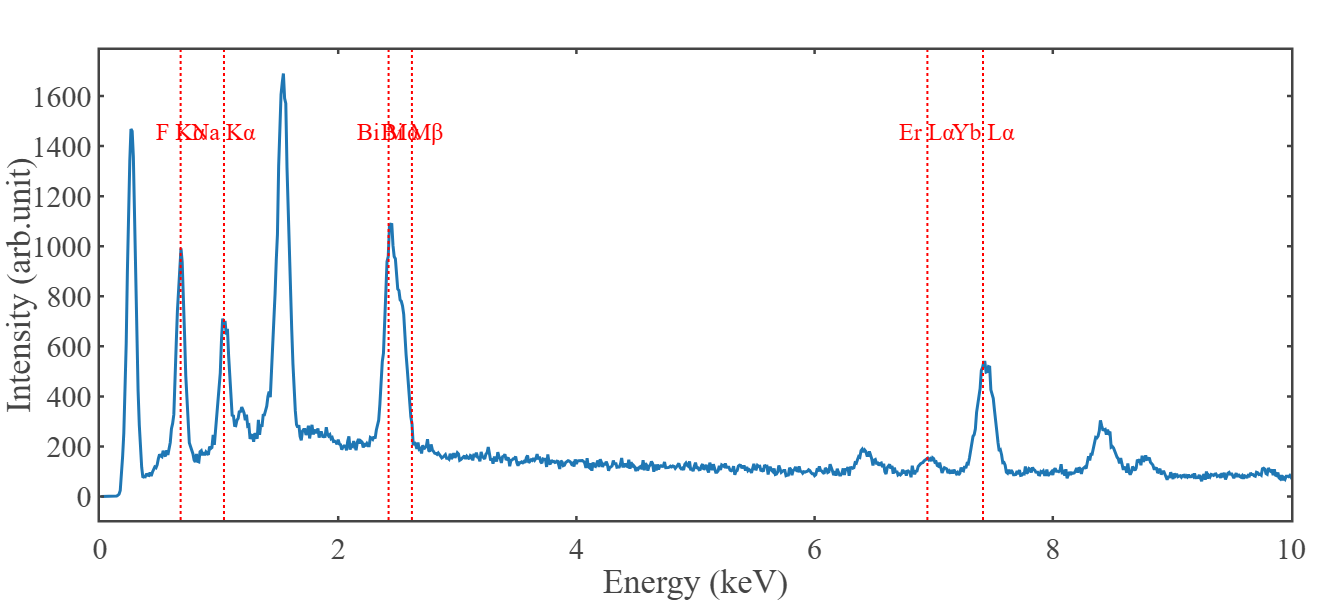

In [88]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import os

fig_template = go.layout.Template()
fig_template.layout = go.Layout(
    template='simple_white+presentation',
    autosize=False,
    width=800,
    height=600,
    xaxis=dict(
        ticks='inside',
        mirror='ticks',
        linewidth=2.5,
        tickwidth=2.5,
        ticklen=4,
        showline=True,
        showgrid=False,
        zerolinecolor='white',
        title=dict(font=dict(size=34)),
        tickfont=dict(size=30)
    ),
    yaxis=dict(
        ticks='inside',
        mirror='ticks',
        linewidth=2.5,
        tickwidth=2.5,
        ticklen=4,
        showline=True,
        showgrid=False,
        zerolinecolor='white',
        title=dict(font=dict(size=34)),
        tickfont=dict(size=30)
    ),
    font=dict(family='mathjax', size=30)
)

# ============================================================
# --- File Path ---
# ============================================================
file_path = r"C:\Users\Atanu\OneDrive\Desktop\research_work\paper\NaBiF4_PL_analysis\SEM\NaBiF4\1.csv"

# ============================================================
# --- Load Data ---
# ============================================================
df = pd.read_csv(file_path)

# Automatically detect numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) < 2:
    raise ValueError("Not enough numeric columns found in CSV for plotting.")

x_col = numeric_cols[0]
y_col = numeric_cols[1]

# ============================================================
# --- Create Plotly Figure ---
# ============================================================
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df[x_col],
    y=df[y_col],
    mode='lines',
    line=dict(width=3),
    name='EDAX Spectrum'
))

# ============================================================
# --- Set Axis Ranges ---
# ============================================================
fig.update_xaxes(range=[0, 10])     # Energy in keV
fig.update_yaxes(range=[0, None])   # Auto upper bound

# ============================================================
# --- Annotate Element Peaks (for NaBiF4 : Er3+, Yb3+) ---
# ============================================================
# Energies (keV) from standard X-ray line tables (Kα or Lα/Mα lines)
peaks = {
    "F Kα": 0.677,
    "Na Kα": 1.041,
    "Bi Mα": 2.423,
    "Bi Mβ": 2.619,
    "Er Lα": 6.947,
    "Yb Lα": 7.414,
}

for label, xval in peaks.items():
    fig.add_vline(x=xval, line=dict(color="red", width=2, dash="dot"))
    fig.add_annotation(
        x=xval,
        y=max(df[y_col]) * 0.9,  # position annotation near top
        text=label,
        showarrow=False,
        font=dict(size=24, color="red"),
        yanchor="top"
    )

# ============================================================
# --- Layout Settings ---
# ============================================================
fig.update_layout(
    template=fig_template,
    width=800,
    height=600,
    margin=dict(l=100, r=50, t=50, b=80),
    xaxis_title="Energy (keV)",
    yaxis_title="Intensity (arb.unit)",
)

# ============================================================
# --- Save Figure as PNG ---
# ============================================================
# output_path = os.path.splitext(file_path)[0] + "_EDAX.png"
# fig.write_image(output_path, scale=4)  # scale=4 for high DPI (e.g., publication)
# print(f"✅ Figure saved as: {output_path}")

# ============================================================
# --- Show Figure ---
# ============================================================
fig.show()